# Magnetic anomaly of a buried prism
We follow *Militzer & Weber*, vol. 1.

In [1]:
using Plots
using LinearAlgebra
using GravMag

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1278
┌ Info: Precompiling GravMag [df05b254-b6ff-44d6-83e9-0bb4a0fd7a53]
└ @ Base loading.jl:1278


We calculate the cartesian components $(\delta X, \delta Y, \delta Z)$ of the magnetic anomaly in the point $(x,y,z)$. 

The horizontal component $\delta H$ can be computed from

$$
\delta H = \delta X \cos D_0 + \delta Y \sin D_0.
$$

$D_0$ is the angle of declination measured eastwards from magnetic north.

$\mathbf M = (M_1, M_2, M_3)$ is the magnetization of the prismatic body, which can be obtained
from the susceptibility $\kappa$ and the inducing main field $\mathbf T_0$, such that

\begin{equation}
\mathbf M = \mathbf T_0 \frac{\kappa}{\mu_0}.
\end{equation}

The total field anomaly is the projection of the anomaly onto the direction of the main field:

$$
\delta T = \frac{\mathbf T_0}{|\mathbf T_0 |} \cdot 
\begin{pmatrix}
\delta X \\ \delta Y \\ \delta Z
\end{pmatrix}
$$

We make the important note that the problem is linear in $\kappa$!

As an example, we consider a susceptibilty of $\kappa = 0.126$, and a magnetic main field typical for Middle Europe.

Note the angles of inclination and declination.

In [2]:
T0 = [18400.0, 0.0, 43500.0]
mu0 = pi * 4e-7
kappa = 0.126
M = T0 ./ mu0 * kappa
inkl = 180.0 / pi * atan(T0[3], sqrt(T0[1]^2 + T0[2]^2))
dekl = 180.0 / pi * atan(T0[2], T0[1])

@show inkl
@show dekl;

inkl = 67.07219653101721
dekl = 0.0


Let's define a grid of measurements on a flat surface.

In [3]:
x = range(-200.0, stop=200.0, length=100)
y = range(-200.0, stop=200.0, length=100);

On this surface, we compute synthetic anomalies for a prism as well as a magnetic dipole (of the same magnetization).

In [4]:
Bt = zeros(length(x), length(y))
Bt2 = zeros(length(x), length(y))
B = zeros(length(x), length(y), 3)
B2 = zeros(length(x), length(y), 3)
dB = zeros(3)
for i = 1:length(x)
    for k = 1:length(y)
        #dB = mprism(x[i], y[k], 0.0, [-2.5, 2.5], [-2.5, 2.5], [37.5, 42.5], M)
        mprism!(dB, x[i], y[k], 0.0, [-2.5, 2.5], [-2.5, 2.5], [37.5, 42.5], M)
        Bt[i, k] = dot(dB, dircos(inkl, dekl))
        B[i, k, :] = dB
        dB = dipole(M * 125.0, [x[i], y[k], 0.0], [0.0, 0.0, 40.0])
        Bt2[i, k] = dot(dB, dircos(inkl, dekl))
        B2[i, k, :] = dB
    end
end

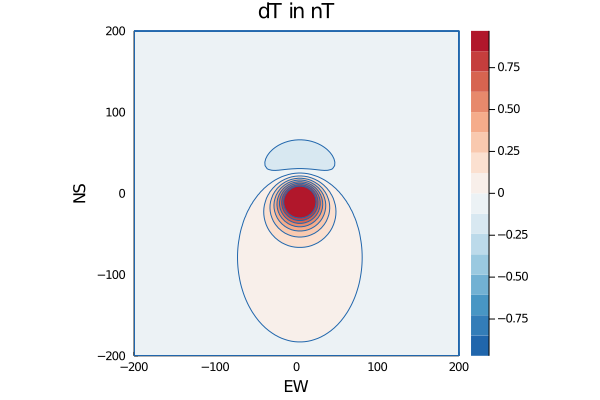

In [5]:
cm = 0.6 * maximum(Bt)
contour(x, y, Bt, fill=true, opacity=1.0, 
        xlabel="EW",
        ylabel="NS",
        c=cgrad(:RdBu_9, rev=true),
        clims=(-cm, cm),
        aspect_ratio=:equal)
title!("dT in nT")
xlims!((x[1], x[end]))
ylims!((y[1], y[end]))

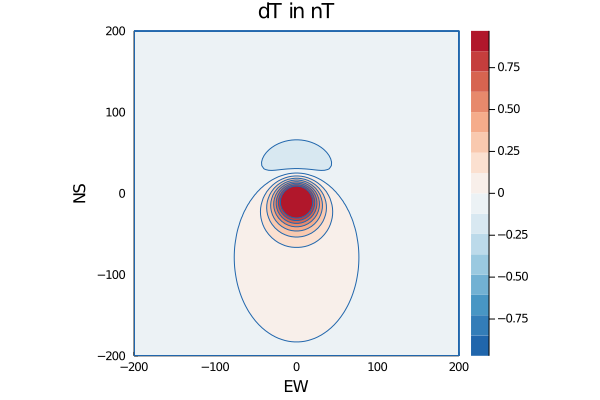

In [6]:
cm = 0.6 * maximum(Bt)
contour(x, y, Bt2, fill=true, opacity=1.0, 
        xlabel="EW",
        ylabel="NS",
        c=cgrad(:RdBu_9, rev=true),
        clims=(-cm, cm),
        aspect_ratio=:equal)
title!("dT in nT")
xlims!((x[1], x[end]))
ylims!((y[1], y[end]))